In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
num_words=10000)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
test_data.size

25000

In [ ]:
train_data.size

25000

In [ ]:
test_labels.shape

(25000,)

In [ ]:
train_labels.shape

(25000,)

In [ ]:
train_labels[24999]

0

In [ ]:
test_labels[0]

0

In [ ]:
train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

In [ ]:
max([max(sequence) for sequence in train_data])

9999

How to decode you IMBD Data into English

In [ ]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
[(value, key) for (key, value) in word_index.items()])
decoded_review = ' '.join(
[reverse_word_index.get(i - 3, '?') for i in train_data[0]])
decoded_review

1654784/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

# Preparing the data

In [ ]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
        return results

In [ ]:
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [ ]:
x_train.shape

(25000, 10000)

In [ ]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')
y_test

array([0., 1., 1., ..., 0., 0., 0.], dtype=float32)


# INITIALIZE MODEL

In [ ]:
from tensorflow.keras import models
from tensorflow.keras import layers
from keras import regularizers
model = models.Sequential()
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, kernel_regularizer=regularizers.l2(0.001),activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#model = models.Sequential()
# model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
# model.add(layers.Dense(16, activation='relu'))
# model.add(layers.Dense(1, activation='sigmoid'))

# Complie Model

In [ ]:
from tensorflow.keras import optimizers
from tensorflow.keras import losses
from tensorflow.keras import metrics

In [ ]:
# model.compile(optimizer='rmsprop',
# loss='binary_crossentropy',
# metrics=['accuracy'])
model.compile(optimizer=optimizers.RMSprop(lr=0.001),
loss=losses.binary_crossentropy,
metrics=[metrics.binary_accuracy])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [ ]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

In [ ]:
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
len(y_train)

25000

# Training Model

In [ ]:
history = model.fit(partial_x_train,
partial_y_train,
epochs=20,
batch_size=512,
validation_data=(x_val, y_val))

# Train with minimum 3 to 4 epochs to minimize overfitting 

# history = model.fit(x_train, y_train, epochs=3, batch_size=512, validation_data=(x_val,y_val))


# results = model.evaluate(x_test, y_test)

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.7118 - binary_accuracy: 0.5022 - val_loss: 0.7057 - val_binary_accuracy: 0.4947
Epoch 2/20
30/30 [==============================] - 1s 33ms/step - loss: 0.7044 - binary_accuracy: 0.5035 - val_loss: 0.7032 - val_binary_accuracy: 0.4947
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.7021 - binary_accuracy: 0.5035 - val_loss: 0.7010 - val_binary_accuracy: 0.4947
Epoch 4/20
30/30 [==============================] - 1s 33ms/step - loss: 0.7001 - binary_accuracy: 0.5035 - val_loss: 0.6992 - val_binary_accuracy: 0.4947
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.6984 - binary_accuracy: 0.5035 - val_loss: 0.6977 - val_binary_accuracy: 0.4947
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.6970 - binary_accuracy: 0.5035 - val_loss: 0.6965 - val_binary_accuracy: 0.4947
Epoch 7/20
30/30 [==============================] - 1s 33ms/step - los

#model have own History Dictionory  which contain all matrics about model.

In [ ]:
history_dict = history.history  
history_dict

{'binary_accuracy': [0.5022000074386597,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404,
  0.5035333037376404],
 'loss': [0.711791455745697,
  0.7044439315795898,
  0.7020902633666992,
  0.7000985145568848,
  0.6984192132949829,
  0.6970382332801819,
  0.695921003818512,
  0.6950437426567078,
  0.6943856477737427,
  0.6939103007316589,
  0.6935787796974182,
  0.6933649778366089,
  0.6932453513145447,
  0.6931831240653992,
  0.6931629180908203,
  0.6931657195091248,
  0.6931626796722412,
  0.6931644678115845,
  0.693164050579071,
  0.6931664347648621],
 'val_binary_accuracy': [0.49470001459121704,
  0.49470001459121704,
  0.49470001459121704,
  

In [ ]:
results = model.evaluate(x_test, y_test)


782/782 [==============================] - 2s 2ms/step - loss: 0.6932 - binary_accuracy: 0.5000


In [ ]:
results

[0.6932045817375183, 0.5]

In [ ]:
model.predict(x_test)

array([[0.4965724 ],
       [0.49657178],
       [0.49657178],
       ...,
       [0.49657178],
       [0.49657178],
       [0.49657178]], dtype=float32)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
loss_values = history_dict['loss']

In [ ]:
loss_values

In [ ]:
val_loss_values = history_dict['val_loss']
history_dict.keys()


dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

In [ ]:
val_loss_values

[0.7057263851165771,
 0.7031813263893127,
 0.7010399699211121,
 0.6992361545562744,
 0.697731077671051,
 0.696489155292511,
 0.6955078840255737,
 0.6947638392448425,
 0.6942029595375061,
 0.6938177347183228,
 0.6935655474662781,
 0.6934223175048828,
 0.6933344006538391,
 0.6932930946350098,
 0.6932961940765381,
 0.6932714581489563,
 0.6932569146156311,
 0.6932622194290161,
 0.6932700276374817,
 0.6932759284973145]

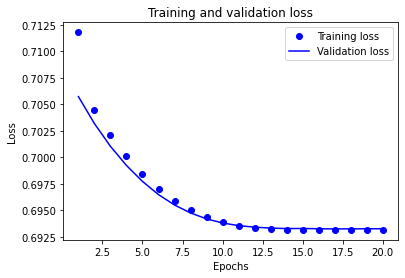

In [ ]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

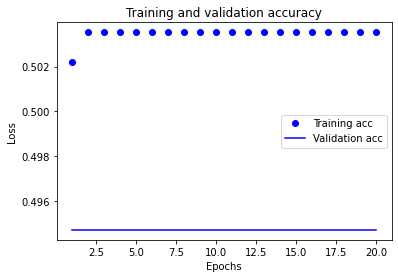

In [ ]:
plt.clf()
acc_values = history_dict['binary_accuracy']
val_acc_values = history_dict['val_binary_accuracy']
plt.plot(epochs, acc_values, 'bo', label='Training acc')
plt.plot(epochs, val_acc_values, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()